

1. Оценить высокочастотную периодичность прироста новых случаев заболевания, найти период и сформулировать гипотезы
2. Определить даты наивысших точек каждой волны заболеваемости



In [22]:
# Импорт библиотек
import numpy as np # Импорт библиотеки NumPy для работы с массивами и математическими операциями
import pandas as pd # Импорт библиотеки Pandas для работы с данными в виде таблицы DataFrame
import matplotlib.pyplot as plt # Импорт библиотеки Matplotlib для визуализации данных
from matplotlib.pyplot import figure # Импорт функции figure из Matplotlib для настройки размера графика
from tqdm import tqdm # Импорт библиотеки tqdm для отображения индикатора выполнения прогресса
from google.colab import drive

In [23]:
# Импорт и вывод шапки датафрейма

drive.mount('/content/gdrive') # Монтируем Google Диск
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Time series/COVID.csv' # Путь к файлу на Google Диске

# Чтение файла с помощью pandas
df = pd.read_csv(file_path) # Загрузка данных из CSV-файла в объект DataFrame с использованием Pandas
df.head() # Вывод первых 10 строк DataFrame для предварительного просмотра данных

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,DateTime,Заражений за день,Выздоровлений за день,Смертей за день
0,2020-03-12 00:00:00,34,0,0
1,2020-03-13 00:00:00,11,0,0
2,2020-03-14 00:00:00,14,0,0
3,2020-03-15 00:00:00,4,3,0
4,2020-03-16 00:00:00,28,2,0


Text(0, 0.5, 'Число заболевших')

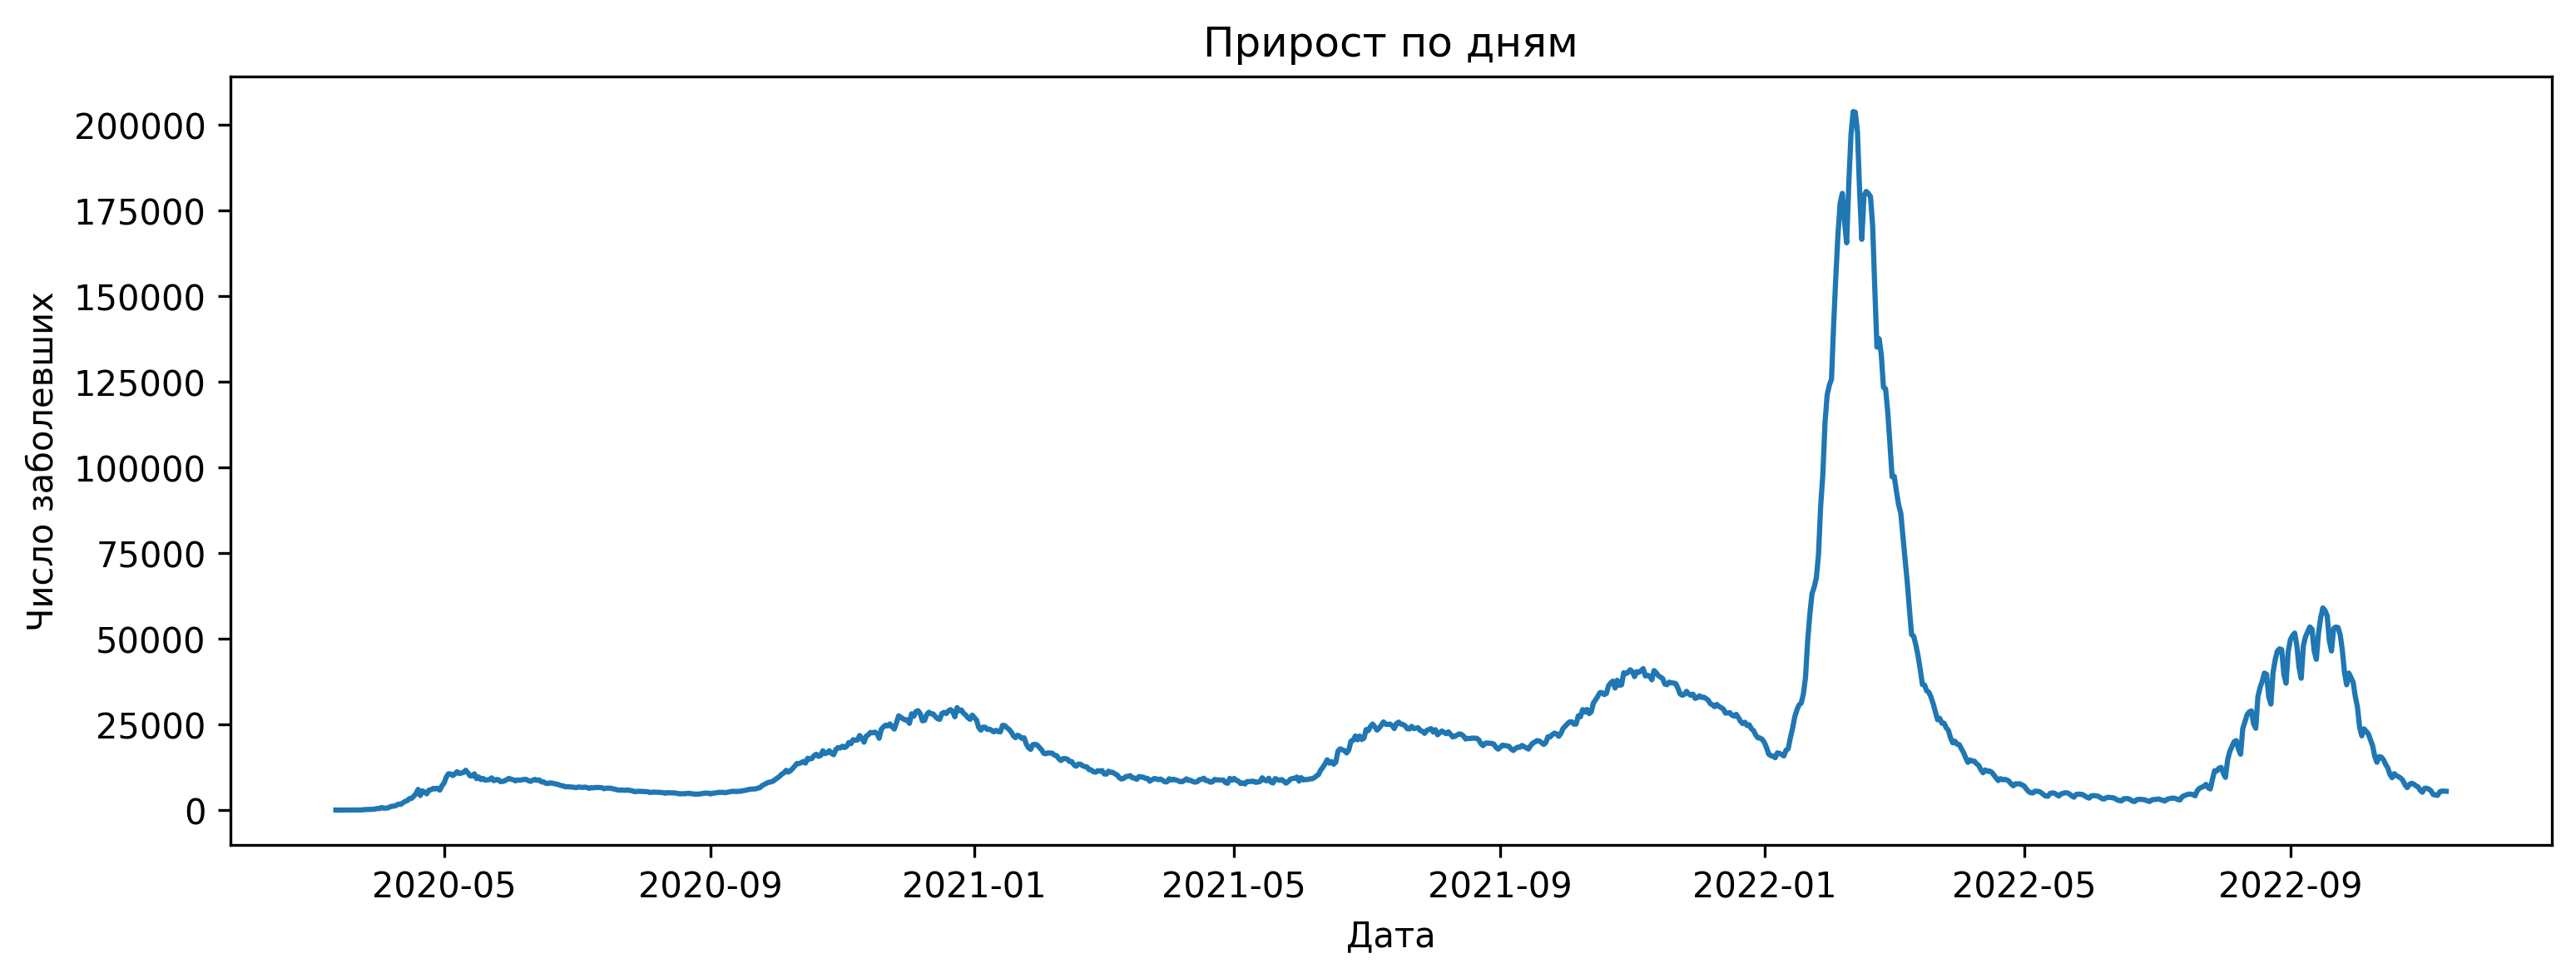

In [24]:
df['DateTime'] = pd.to_datetime(df['DateTime']) # Преобразование столбца 'DateTime' в формат datetime для работы с временными данными

figure(figsize=(12, 4), dpi=300) # Создание графика с размерами 12x4 дюйма и разрешением 90 dpi
plt.plot(df['DateTime'], df['Заражений за день']) # Построение графика прироста заболевших по дням
plt.title('Прирост по дням') # Установка заголовка графика
plt.xlabel('Дата') # Установка подписи оси X
plt.ylabel('Число заболевших') # Установка подписи оси Y

Text(0, 0.5, 'Число заболевших')

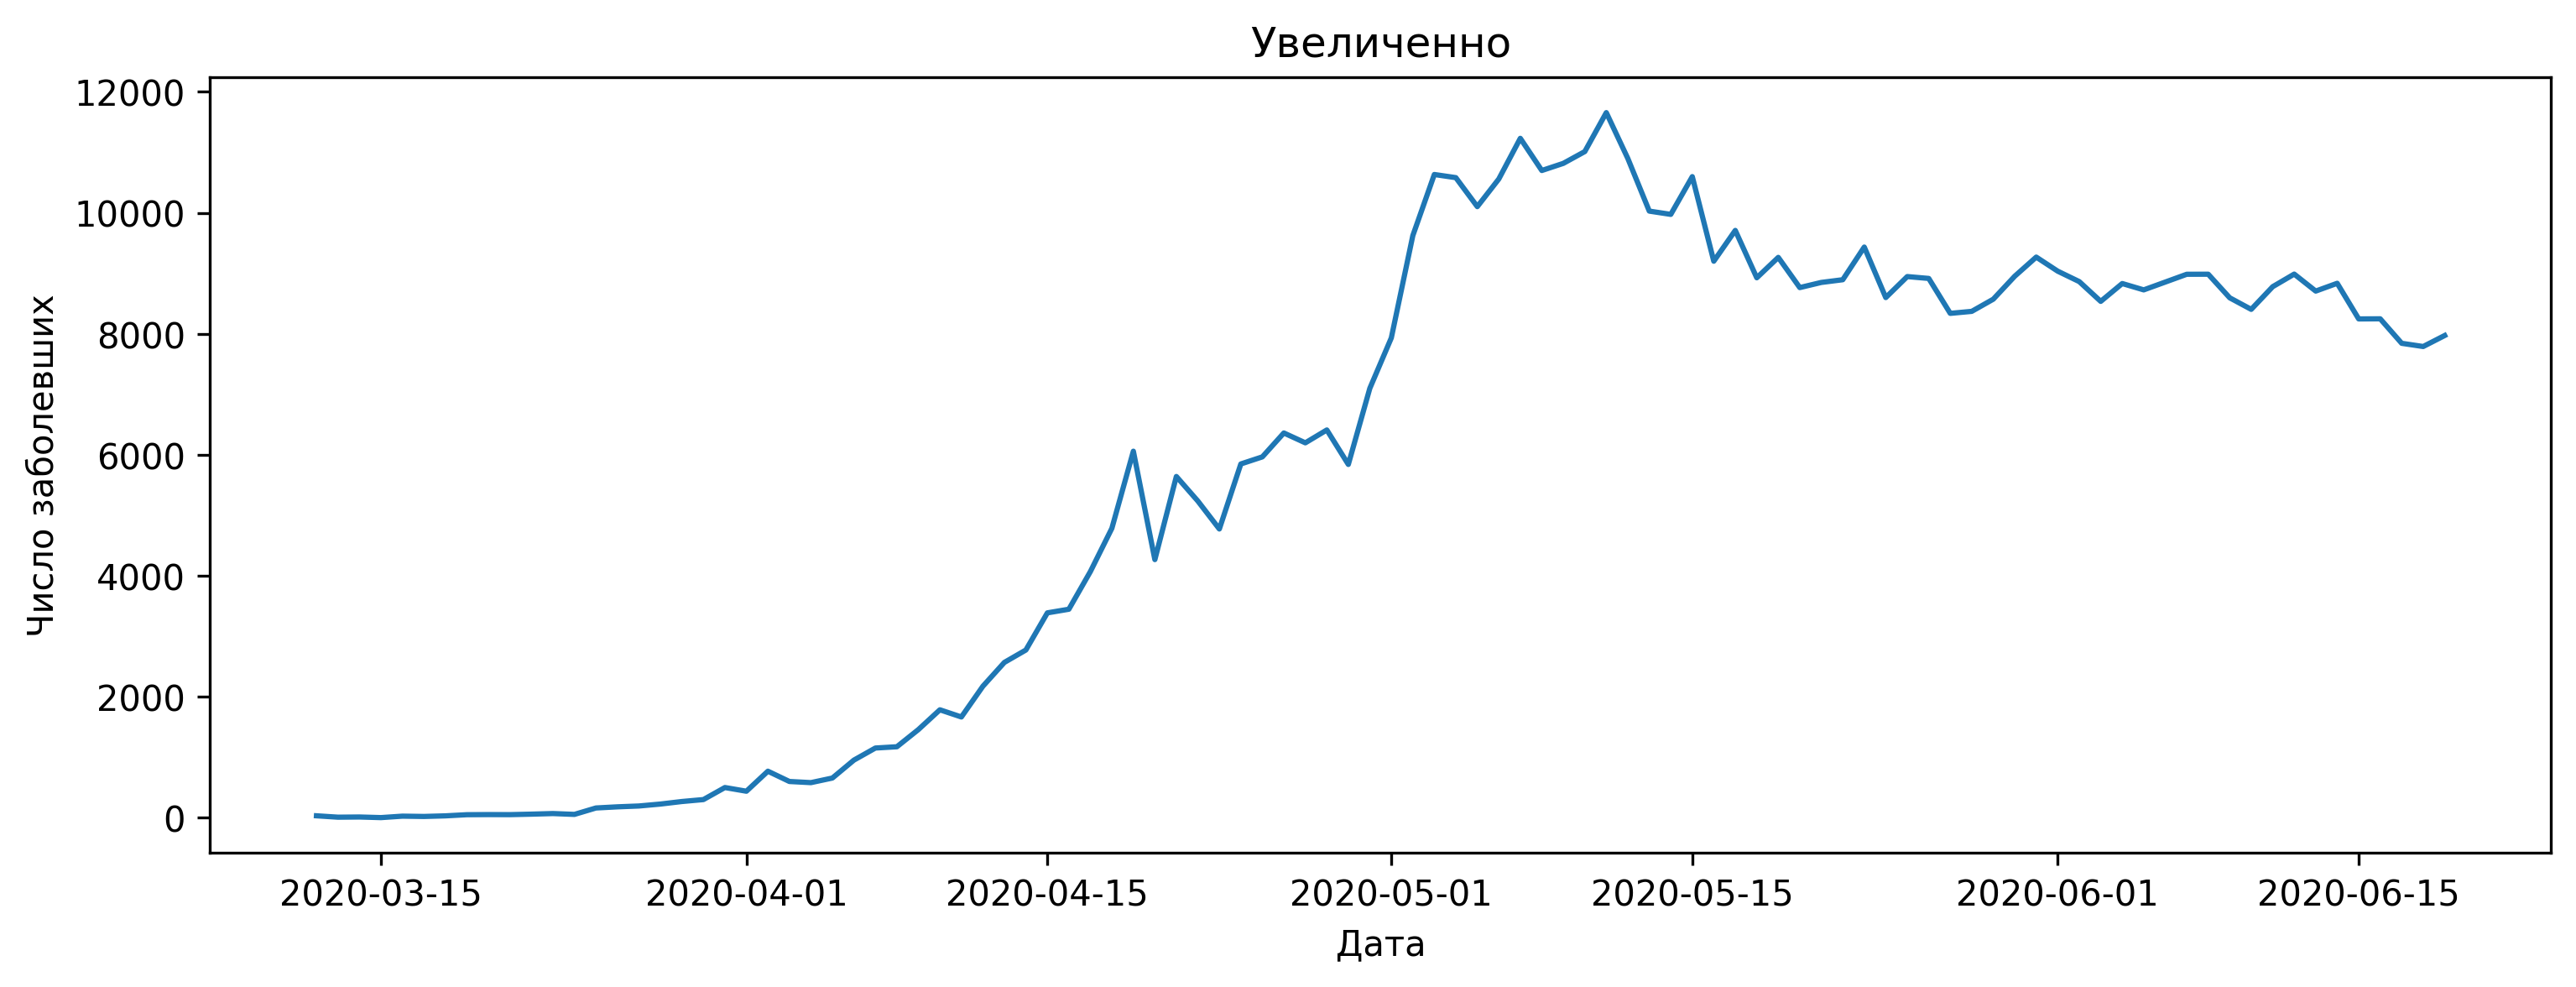

In [25]:
figure(figsize=(12, 4), dpi=300) # Создание графика с размерами 12x4 дюйма и разрешением 300 dpi
plt.title('Увеличенно') # Установка заголовка графика
plt.plot(df['DateTime'][0:100], df['Заражений за день'][0:100]) # Построение графика прироста заболевших по дням для первых 100 записей
plt.xlabel('Дата') # Установка подписи оси X
plt.ylabel('Число заболевших') # Установка подписи оси Y

Изучим частотные характеристики ряда

In [26]:
# Период дискретизации:
td = 60 * 60 * 24  # количество секунд в сутках
td

86400

In [27]:
# Частота дискретизации:
fd = 1/td
fd

1.1574074074074073e-05

In [28]:
df.shape[0]

976

In [29]:
fdarr = []  # Создание пустого массива для хранения частот дискретизации

for i in range(0, df.shape[0]):
    fdarr.append(fd * i / df.shape[0])  # Расчет частоты дискретизации для каждого временного отсчета и добавление в массив

len(fdarr)  # Вывод длины массива частот дискретизации


976

Text(0, 0.5, 'Амплитуда спектра')

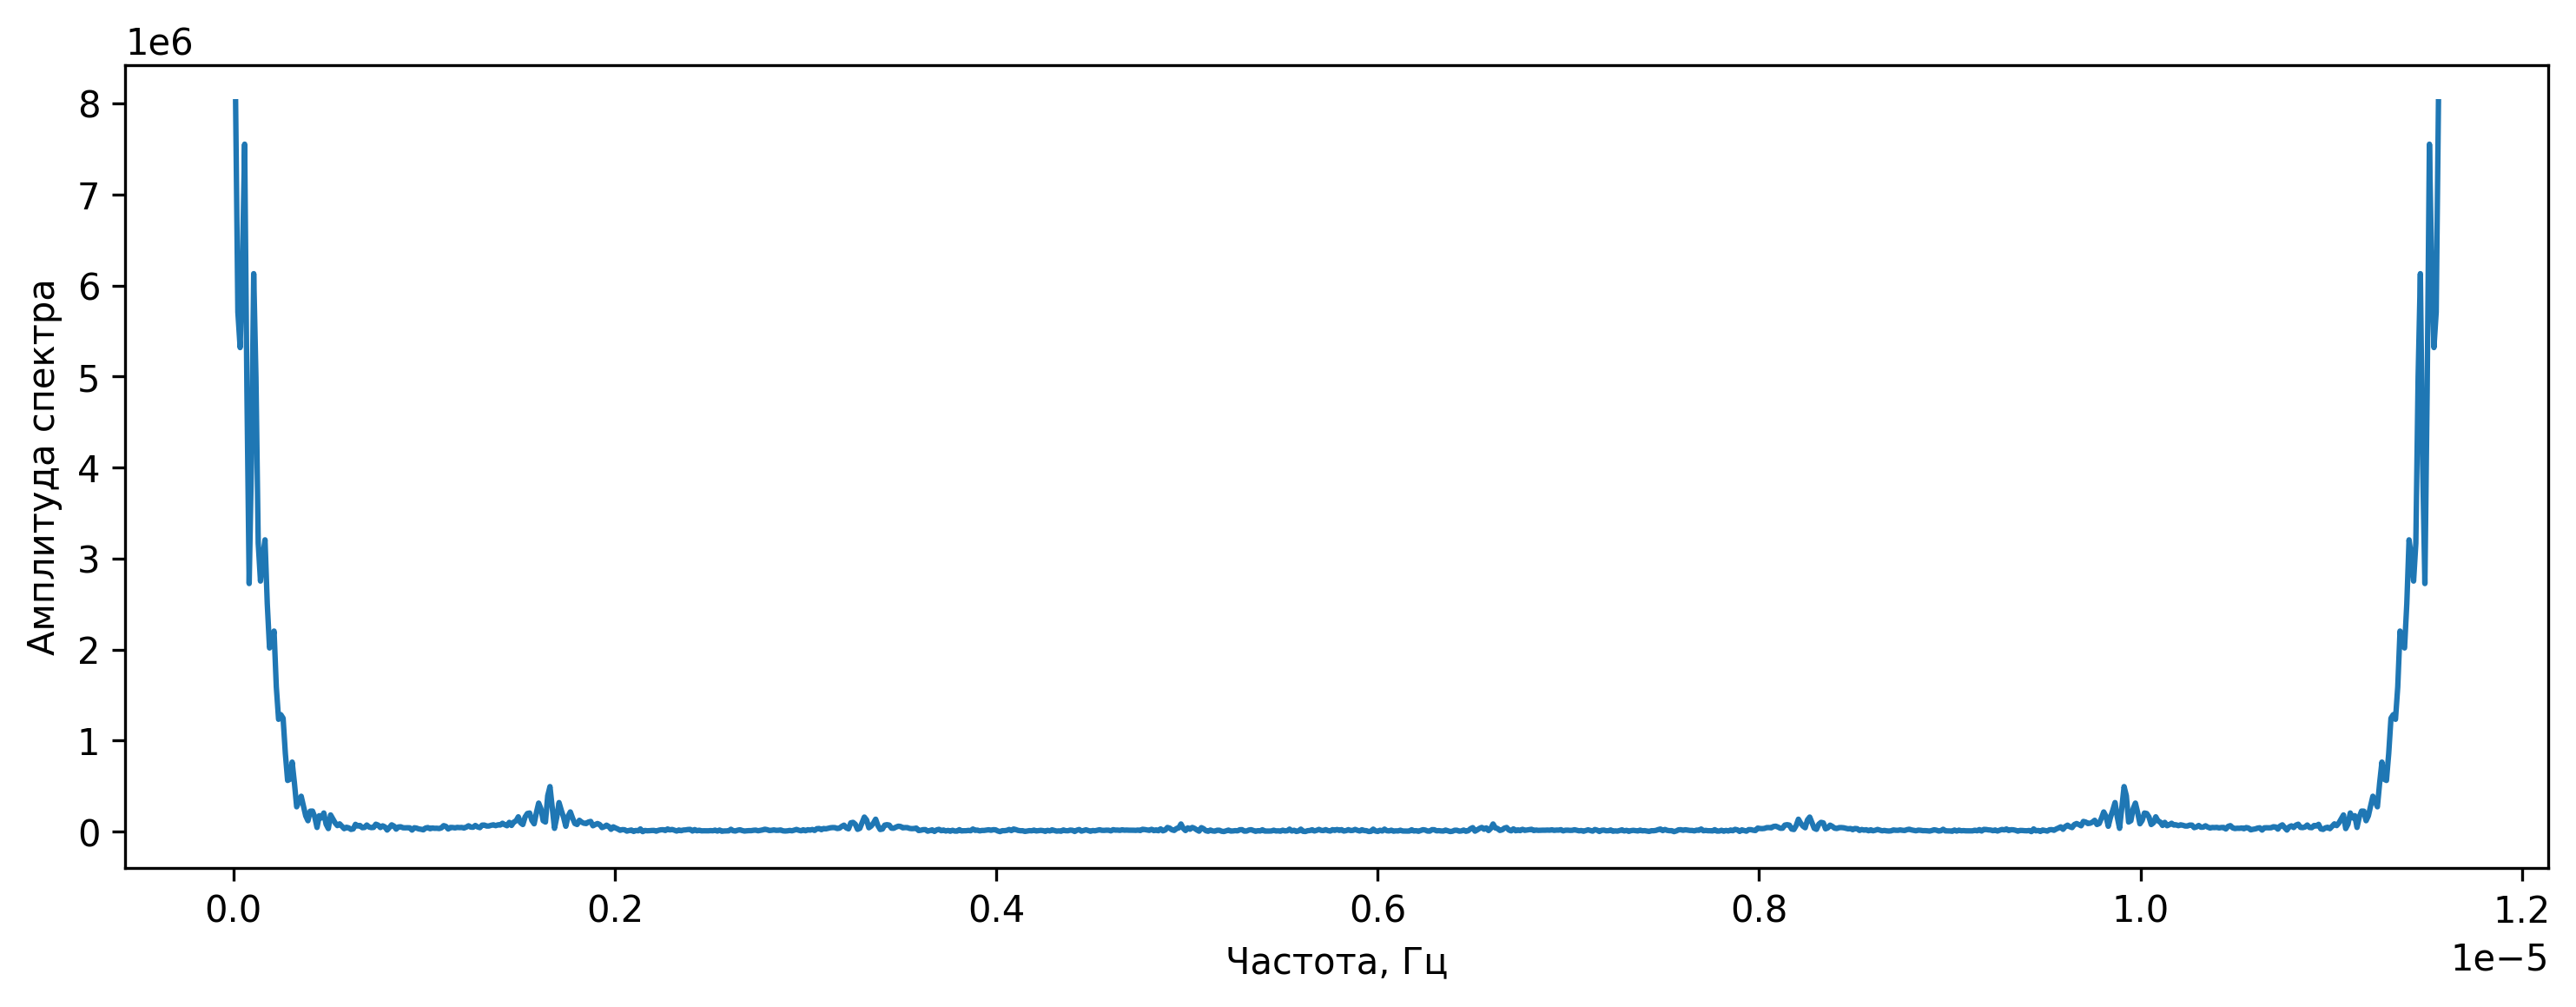

In [30]:
figure(figsize=(12, 4), dpi=300)  # Создание графика с размерами 12x4 дюйма и разрешением 300 dpi
Amps = np.fft.fft(df['Заражений за день'])  # Применение быстрого преобразования Фурье
plt.plot(fdarr[1:], (abs(Amps))[1:])  # Построение графика амплитуды спектра от частоты
plt.xlabel('Частота, Гц')  # Установка подписи оси X
plt.ylabel('Амплитуда спектра')  # Установка подписи оси Y


Text(0, 0.5, 'Амплитуда спектра')

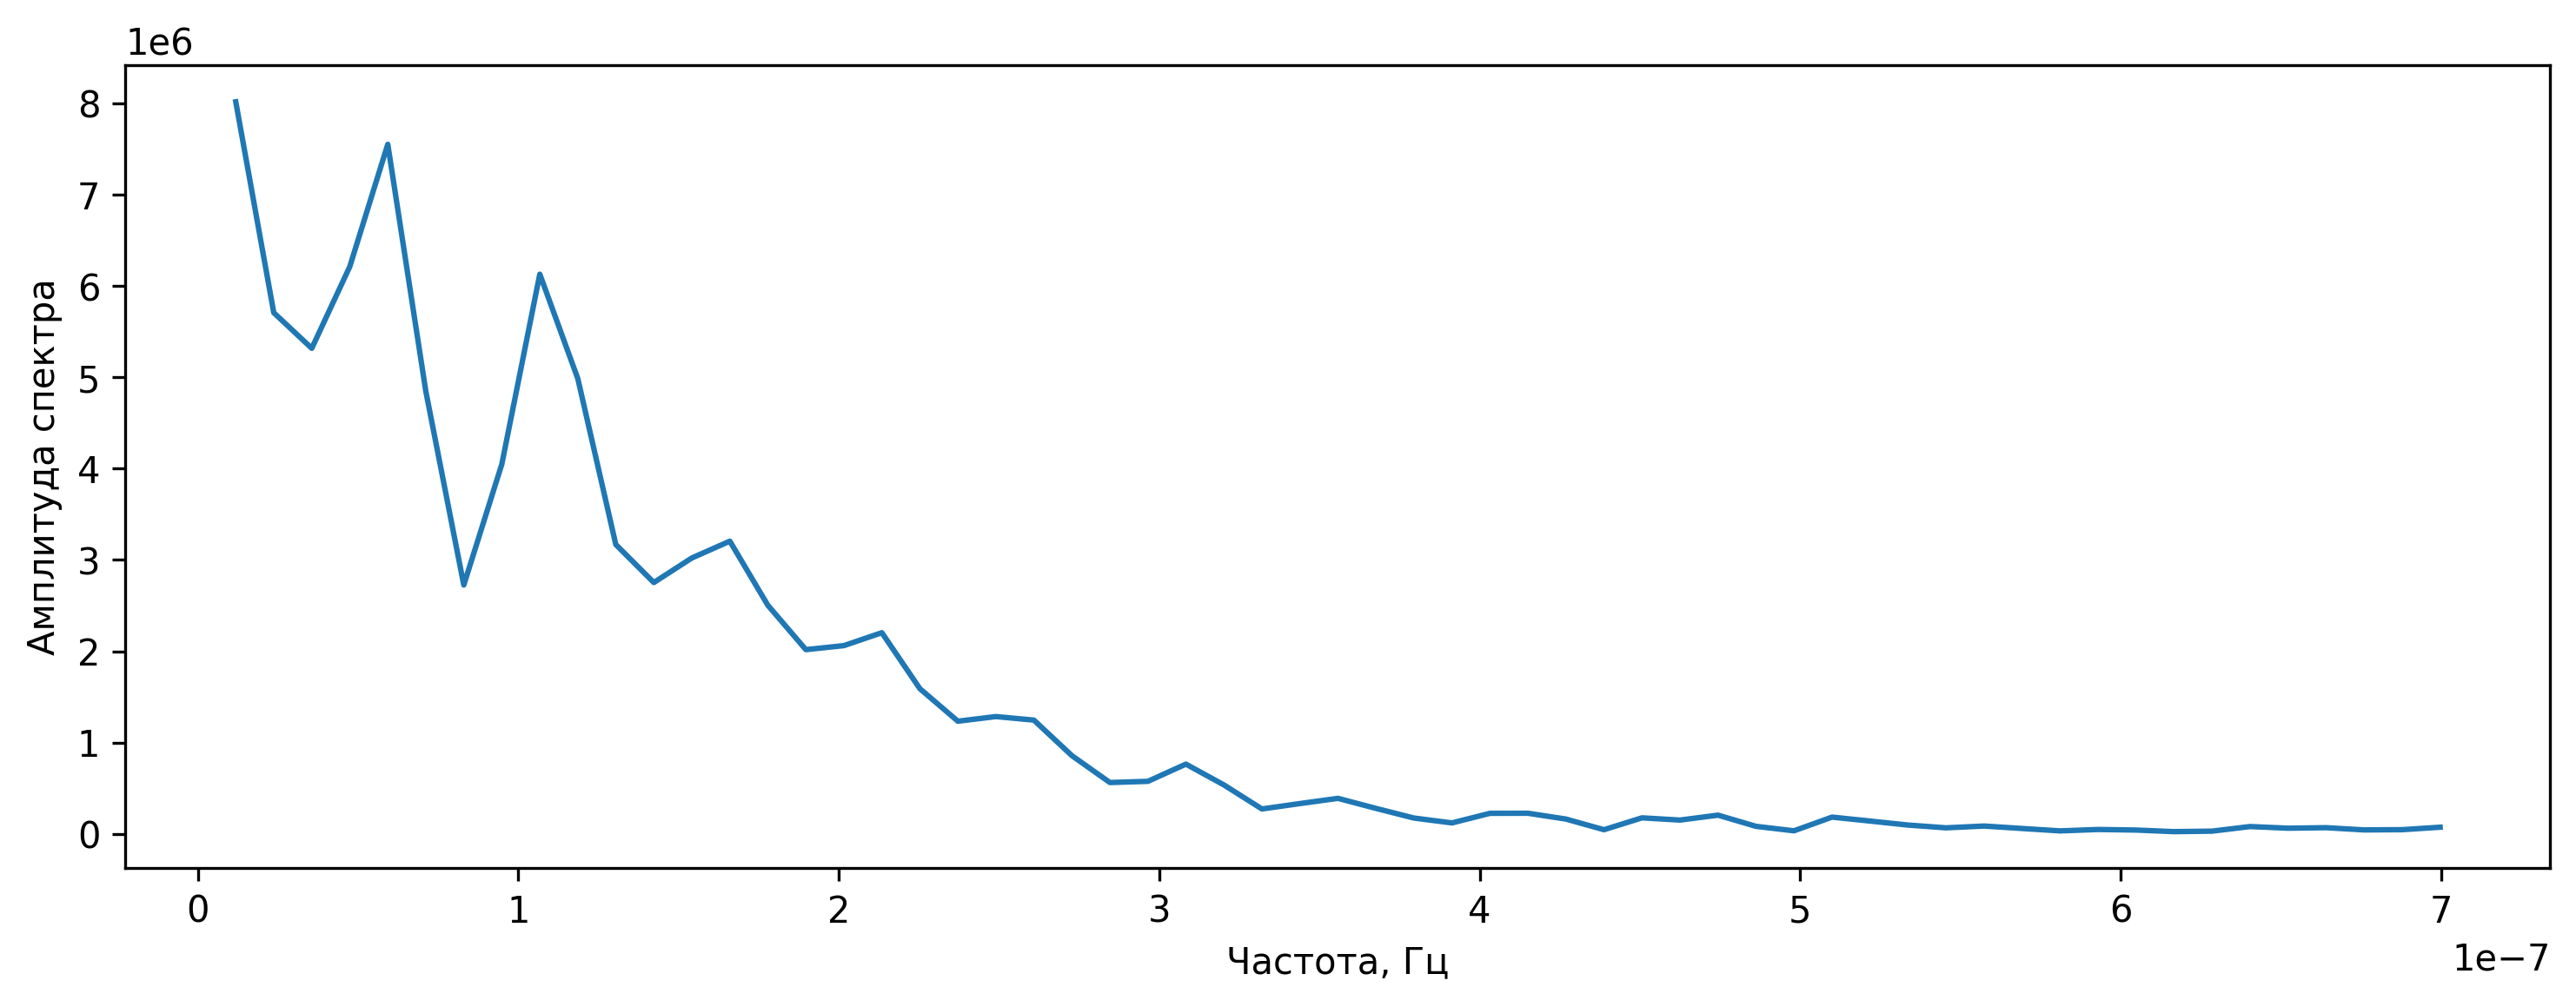

In [31]:
figure(figsize=(12, 4), dpi=300)  # Создание графика с размерами 12x4 дюйма и разрешением 300 dpi
Amps = np.fft.fft(df['Заражений за день'])  # Применение быстрого преобразования Фурье
plt.plot(fdarr[1:60], (abs(Amps))[1:60])  # Построение графика амплитуды спектра для первых 60 частот
plt.xlabel('Частота, Гц')  # Установка подписи оси X
plt.ylabel('Амплитуда спектра')  # Установка подписи оси Y

In [32]:
print(str(int(1/(5*10**-7)/(60*60*24))), 'дней')  # Вывод количества дней, соответствующих заданной частоте дискретизации

23 дней


Частоты флуктаций составляет более 5 мкГц, что вызвано частотностью занесения данных в реестр и прочими случайностями. Иформативные изменения происходят с периодичностью более чем в 23 дня

Проведем разложение в ряд Фурье исходной функции

In [33]:
Amps = np.fft.fft(df['Заражений за день'])  # Применение быстрого преобразования Фурье к данным прироста заболевших
re = Amps.real  # Извлечение вещественной части амплитуд спектра
im = Amps.imag  # Извлечение мнимой части амплитуд спектра
amp = np.zeros(df.shape[0])  # Создание массива для хранения амплитуды временных гармоник

for garmonica in range(int(df.shape[0]/2)):
    for t in range(df.shape[0]):
        amp[t] = amp[t] + ((1 / df.shape[0]) * (abs(Amps[garmonica]) * np.cos(2 * np.pi / df.shape[0] * garmonica * t  + np.angle(Amps[garmonica]))))
# Расчет амплитуды временных гармоник с использованием формулы Фурье и накопление значений в массиве 'amp'


Text(0, 0.5, 'Число заболевших')

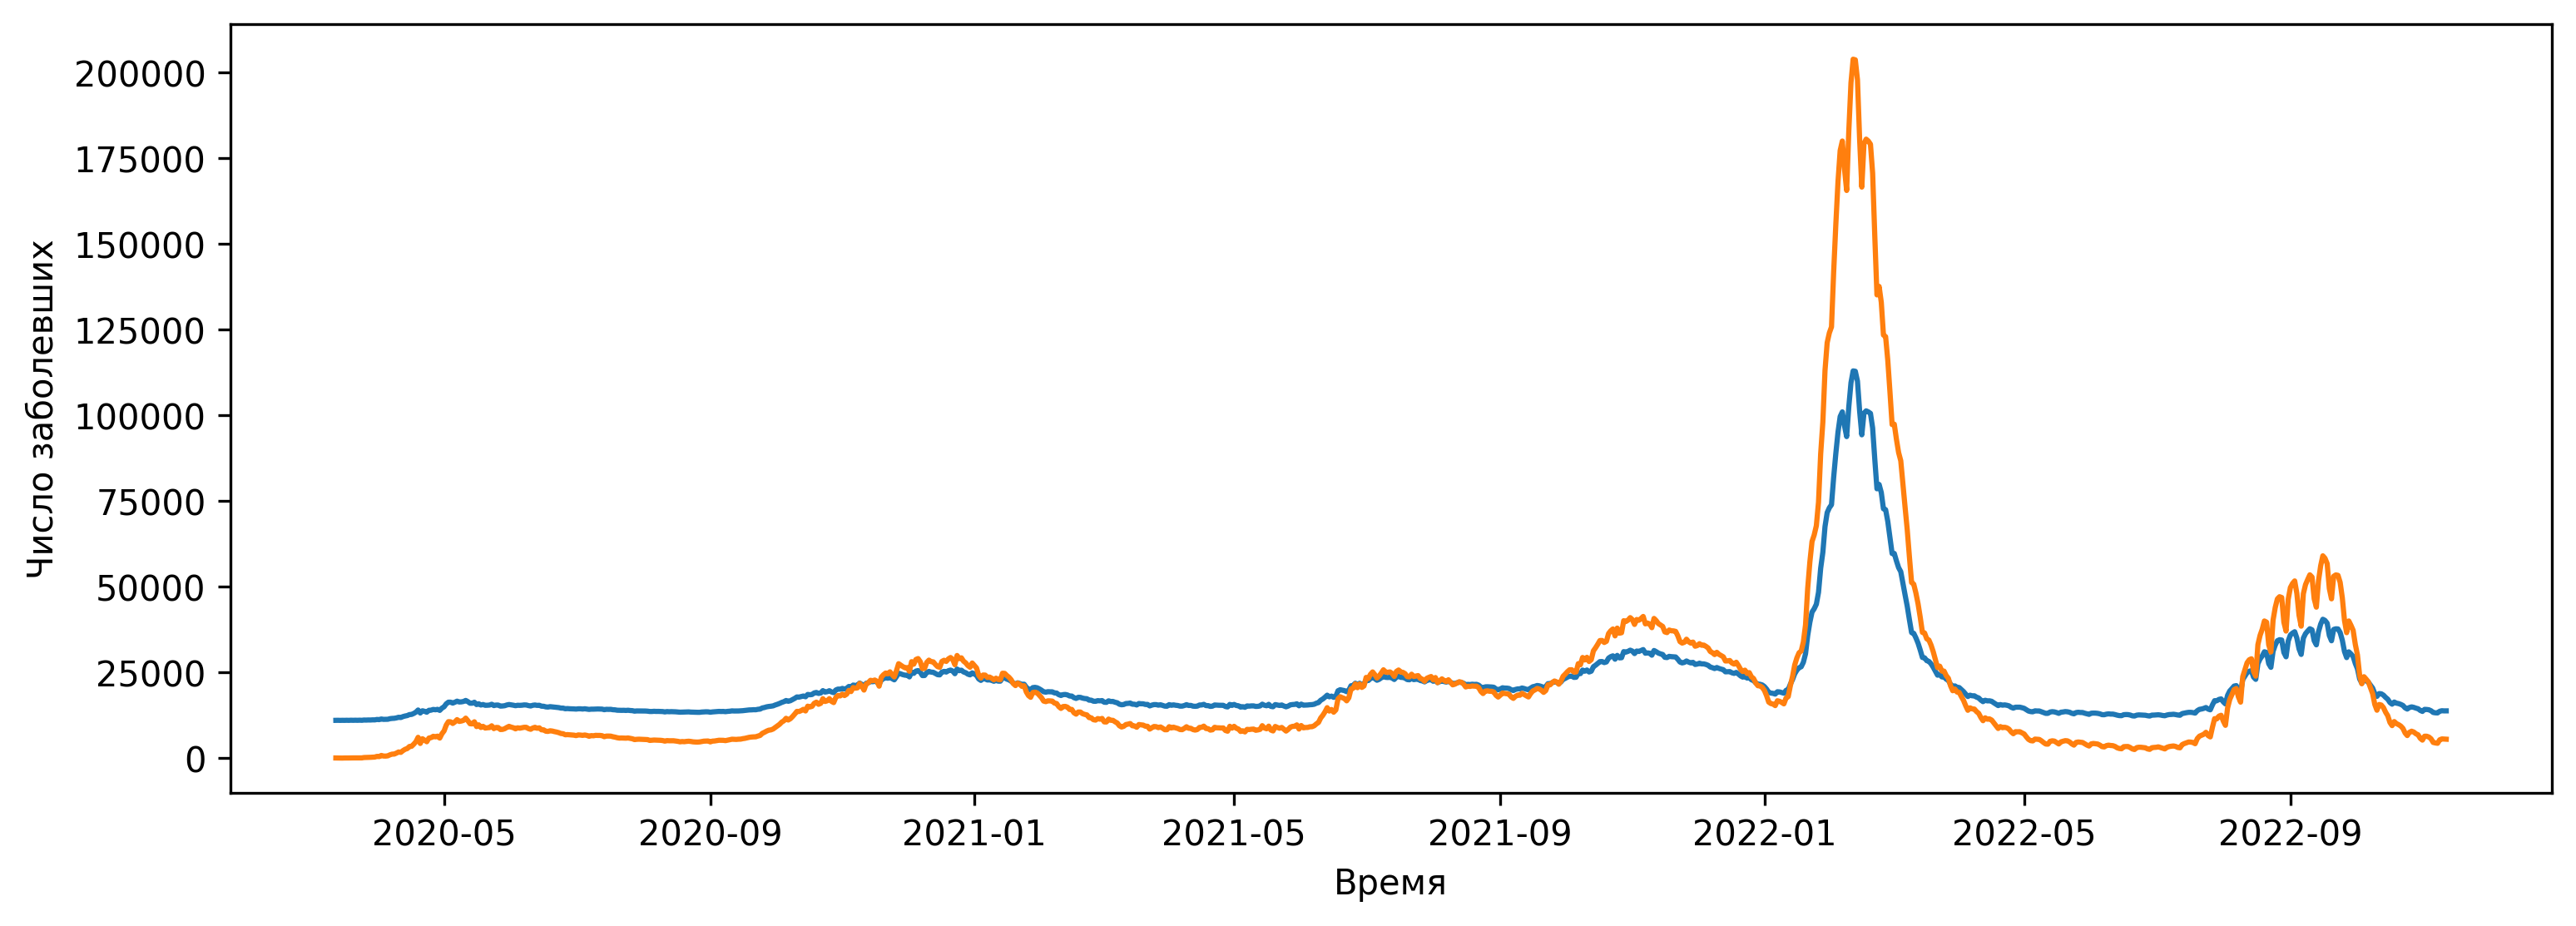

In [34]:
figure(figsize=(12, 4), dpi=300)  # Создание графика с размерами 12x4 дюйма и разрешением 300 dpi
plt.plot(df['DateTime'], amp)  # Построение графика амплитуды временных гармоник
plt.plot(df['DateTime'], df['Заражений за день'])  # Построение графика прироста заболевших по времени
plt.xlabel('Время')  # Установка подписи оси X
plt.ylabel('Число заболевших')  # Установка подписи оси Y

Ограничим число гармоник и посмотрим как восстанавливается сигнал с их увеличением числа

100%|██████████| 5/5 [00:00<00:00, 15.13it/s]


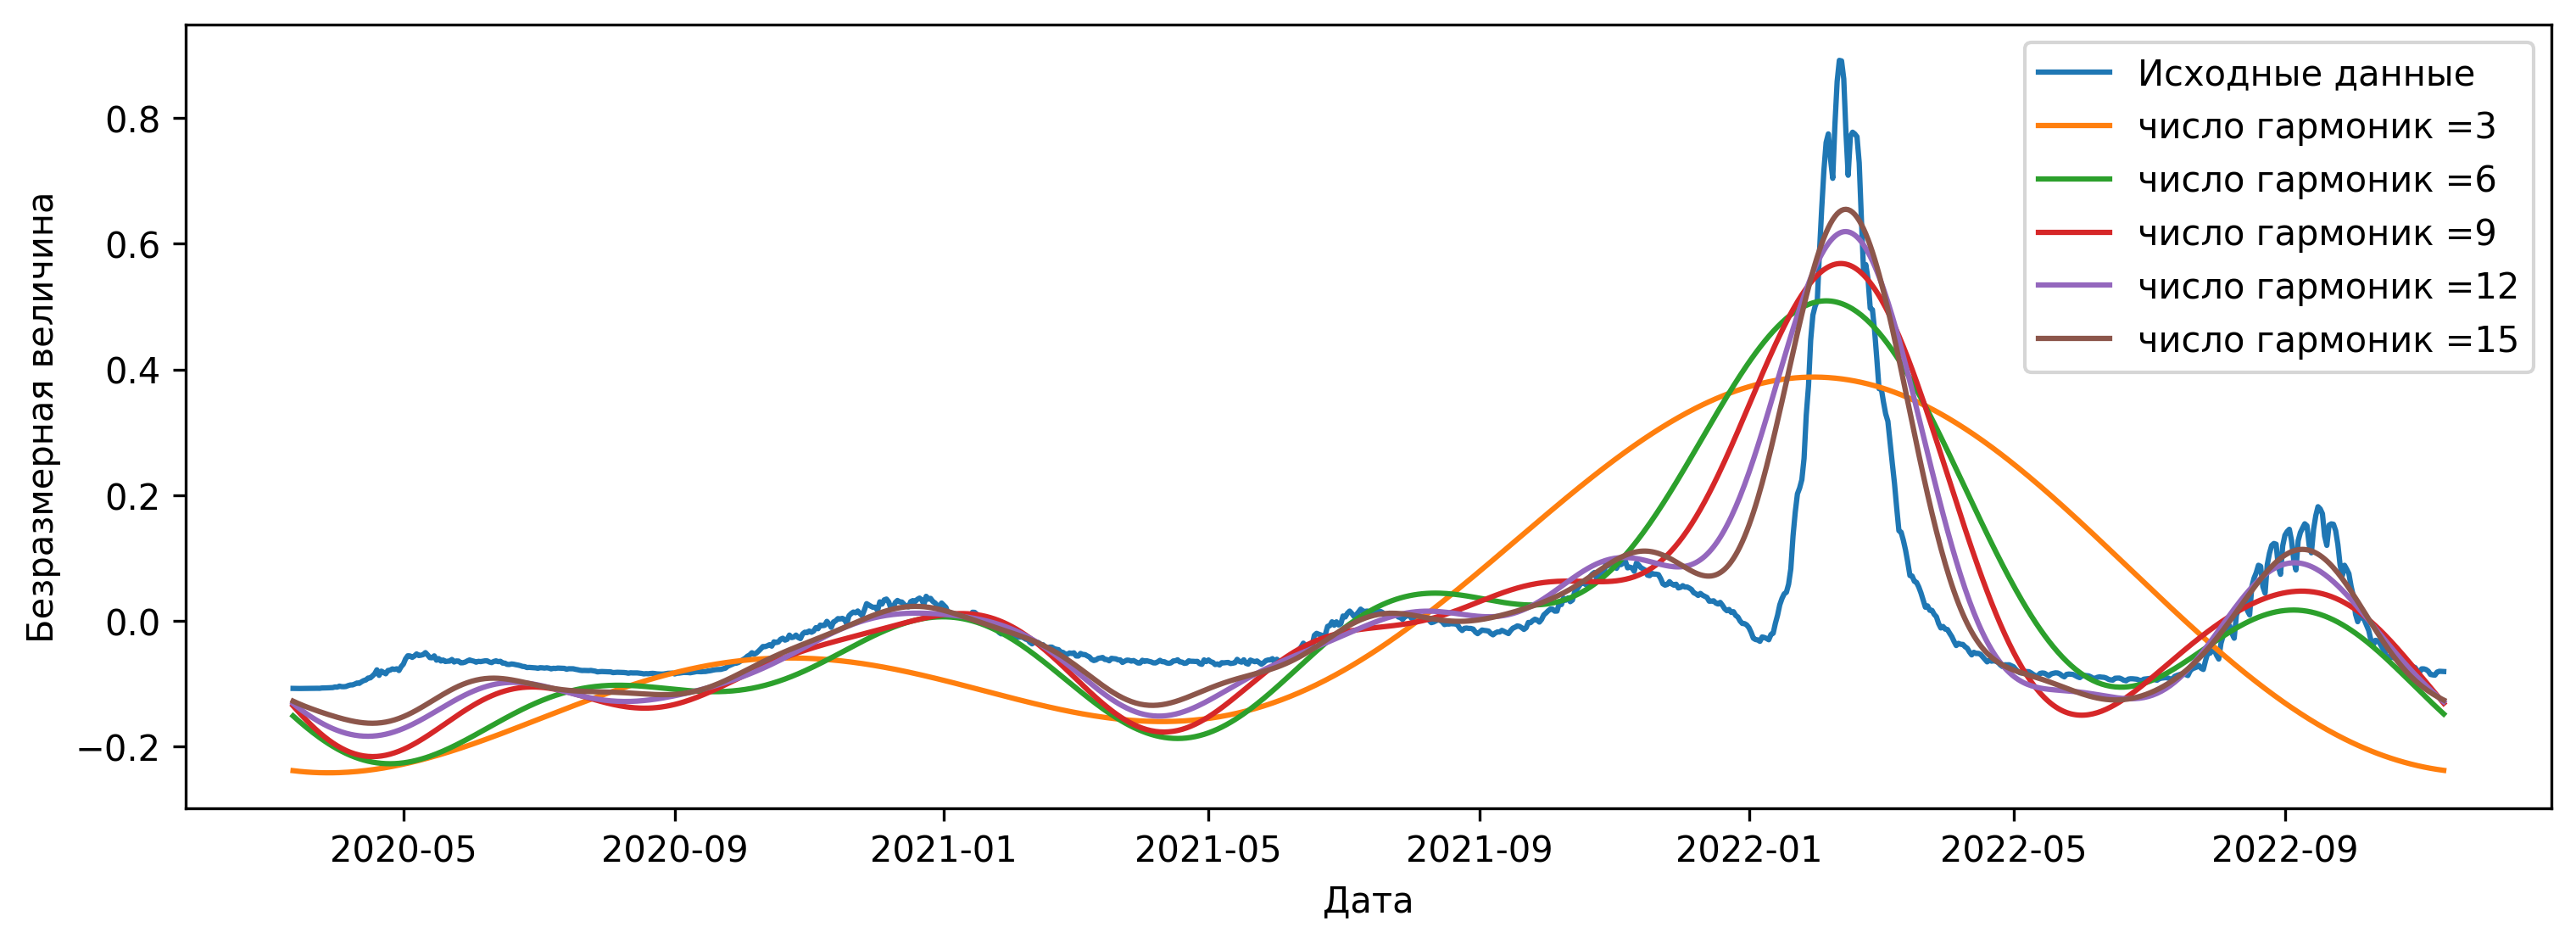

In [35]:
figure(figsize=(12, 4), dpi=300)  # Создание графика с размерами 12x4 дюйма и разрешением 300 dpi

inf = df['Заражений за день']  # Загрузка данных прироста заболевших
plt.plot(df['DateTime'], (inf - inf.mean()) / max(inf), label='Исходные данные')  # Построение графика нормированных исходных данных
plt.xlabel('Дата')  # Установка подписи оси X
plt.ylabel('Безразмерная величина')  # Установка подписи оси Y

amp = np.zeros(df.shape[0])  # Создание массива для хранения амплитуды временных гармоник

for j in tqdm(np.linspace(3, int(df.shape[0]/50), 5, endpoint=False)):  # Итерация по различным значениям числа гармоник
    for garmonica in range(int(j)):
        for t in range(df.shape[0]):
            amp[t] = amp[t] + ((1 / df.shape[0]) * (abs(Amps[garmonica]) * np.cos(2 * np.pi / df.shape[0] * garmonica * t + np.angle(Amps[garmonica]))))
    # Расчет амплитуды гармоник с использованием формулы Фурье и накопление значений в массиве 'amp'
    text = 'число гармоник =' + str(int(j))
    plt.plot(df['DateTime'], (amp - amp.mean()) / max(amp), label=text)  # Построение графика для каждого числа гармоник
plt.legend()  # Отображение легенды


In [36]:
dif = np.diff(amp)  # Вычисление разностей между значениями амплитуд временных гармоник
waves_max = []  # Создание списка для хранения дней пиков заражаемости в волнах
waves_num = []  # Создание списка для хранения номеров дней пиков заражаемости

print('Дни пиков заражаемости в волнах:')
for i in range(1, len(dif)-1):
    if (abs(dif[i-1]) > abs(dif[i])) & (abs(dif[i+1]) > abs(dif[i])) & (dif[i-1] > 0) & (dif[i+1] < 0):
        print(df['DateTime'][i])  # Вывод даты дня пика заражаемости
        waves_max.append(df['DateTime'][i])  # Добавление даты в список
        waves_num.append(i)  # Добавление номера дня в список

Дни пиков заражаемости в волнах:
2020-06-10 00:00:00
2020-12-19 00:00:00
2021-07-23 00:00:00
2021-11-14 00:00:00
2022-02-13 00:00:00
2022-09-08 00:00:00
